In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#importing file
df= pd.read_csv('/content/Breast_Cancer.csv')

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [ ]:
df_num=df.select_dtypes(include=[float,int])

In [ ]:
df_num

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50
...,...,...,...,...,...
4019,62,9,1,1,49
4020,56,46,14,8,69
4021,68,22,11,3,69
4022,58,44,11,1,72


In [ ]:
df_cat=df.select_dtypes(object)
df_cat

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive
...,...,...,...,...,...,...,...,...,...,...,...
4019,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4020,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4021,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Negative,Alive
4022,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive,Alive


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat:
  le=LabelEncoder()
  df_cat[i]=le.fit_transform(df_cat[i])

In [ ]:
df_cat

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,2,1,0,0,0,1,3,1,1,1,0
1,2,1,1,1,2,0,2,1,1,1,0
2,2,0,2,2,4,0,2,1,1,1,0
3,2,1,0,0,0,1,3,1,1,1,0
4,2,1,1,0,1,1,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,0
4020,2,0,1,1,2,0,2,1,1,1,0
4021,2,1,1,0,1,0,2,1,1,0,0
4022,0,0,1,0,1,0,2,1,1,1,0


In [ ]:
df=pd.concat([df_num,df_cat],axis=1)

In [ ]:
df.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,68,4,24,1,60,2,1,0,0,0,1,3,1,1,1,0
1,50,35,14,5,62,2,1,1,1,2,0,2,1,1,1,0
2,58,63,14,7,75,2,0,2,2,4,0,2,1,1,1,0
3,58,18,2,1,84,2,1,0,0,0,1,3,1,1,1,0
4,47,41,3,1,50,2,1,1,0,1,1,3,1,1,1,0


In [ ]:
#Splitting x and y
x=df.drop('Status',axis=1)
y=df['Status']

In [ ]:
x

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status
0,68,4,24,1,60,2,1,0,0,0,1,3,1,1,1
1,50,35,14,5,62,2,1,1,1,2,0,2,1,1,1
2,58,63,14,7,75,2,0,2,2,4,0,2,1,1,1
3,58,18,2,1,84,2,1,0,0,0,1,3,1,1,1
4,47,41,3,1,50,2,1,1,0,1,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,9,1,1,49,1,1,0,0,0,0,2,1,1,1
4020,56,46,14,8,69,2,0,1,1,2,0,2,1,1,1
4021,68,22,11,3,69,2,1,1,0,1,0,2,1,1,0
4022,58,44,11,1,72,0,0,1,0,1,0,2,1,1,1


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4023, dtype: int64

In [ ]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#initialising ann
ann=tf.keras.models.Sequential()

#first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

#second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

#output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

#compiling ann
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = ann.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=200)

Epoch 1/200
101/101 [==============================] - 1s 3ms/step - loss: 1.0624 - accuracy: 0.2613 - val_loss: 0.7713 - val_accuracy: 0.4298
Epoch 2/200
101/101 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6489 - val_loss: 0.5753 - val_accuracy: 0.7863
Epoch 3/200
101/101 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.8462 - val_loss: 0.4754 - val_accuracy: 0.8683
Epoch 4/200
101/101 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8720 - val_loss: 0.4068 - val_accuracy: 0.8795
Epoch 5/200
101/101 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8766 - val_loss: 0.3619 - val_accuracy: 0.8894
Epoch 6/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8816 - val_loss: 0.3342 - val_accuracy: 0.8919
Epoch 7/200
101/101 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8828 - val_loss: 0.3193 - val_accuracy: 0.8907

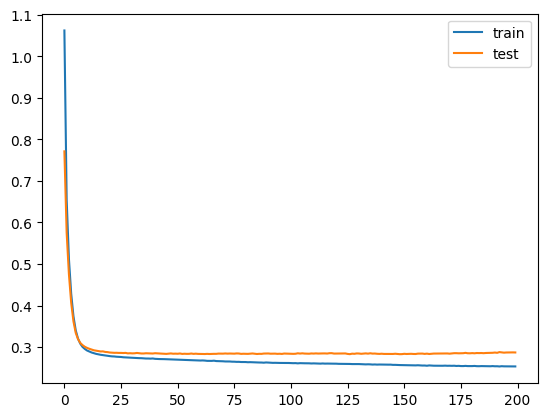

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
ypred=ann.predict(x_test)

26/26 [==============================] - 0s 948us/step


In [ ]:
ypred[0]

array([0.01174572], dtype=float32)

##Early Stopping

In [ ]:
#initialising ann
ann1=tf.keras.models.Sequential()

#first hidden layer
ann1.add(tf.keras.layers.Dense(units=6,activation='relu'))

#second hidden layer
ann1.add(tf.keras.layers.Dense(units=6,activation='relu'))

#output layer
ann1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

#compiling ann
ann1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
callback=EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=False,mode="auto",verbose=1,min_delta=0.00001,baseline=None)

In [ ]:
history = ann1.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=200,callbacks=callback)

Epoch 1/200
101/101 [==============================] - 1s 3ms/step - loss: 0.4934 - accuracy: 0.8030 - val_loss: 0.4171 - val_accuracy: 0.8323
Epoch 2/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8428 - val_loss: 0.3664 - val_accuracy: 0.8398
Epoch 3/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8502 - val_loss: 0.3459 - val_accuracy: 0.8460
Epoch 4/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8543 - val_loss: 0.3343 - val_accuracy: 0.8609
Epoch 5/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8617 - val_loss: 0.3272 - val_accuracy: 0.8733
Epoch 6/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8723 - val_loss: 0.3215 - val_accuracy: 0.8795
Epoch 7/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8735 - val_loss: 0.3176 - val_accuracy: 0.8795

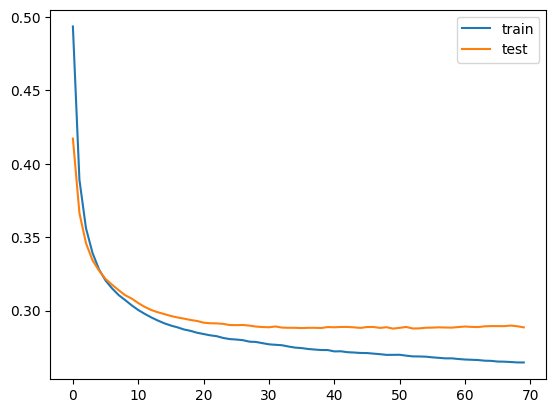

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

It was already accurate model but afetr applying early stopping it became underfitting.